In [2]:
from __future__ import print_function, division, absolute_import
#make compatible with Python 2 and Python 3

In [3]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import bs4 as bs

import requests

import pandas as pd

In [4]:
source = requests.get('https://www.constitutionofindia.net/constitution_assembly_debates/volume/1/1946-12-10')

In [5]:
import matplotlib.pyplot as plt

In [6]:
soup = bs.BeautifulSoup(source.content, features = 'lxml')

In [7]:
data = ''
for p in soup.find_all(['h4', 'p']):
    data = data + ' '+ p.text
#extracting both paragraph and heading content and figuring out what to do with the 1.2.1 style headings
#turns out some content has been filtered out from soup to the paragraph finding stage, for eg: word 'fancy', 
#fixed after using lxml in the features of beautiful soup instead of html.parser
#need to get the dictionary approach working for this, ie each speaker to their dialogue

In [10]:
key = []
value = []
for p in soup.find_all(['h4']):
    if p.isalpha():
        key.extend(p)

for q in soup.find_all(['p']):
    value.extend(q)

TypeError: 'NoneType' object is not callable

In [9]:
key = [k for k in key if k.isalpha()]

TypeError: 'NoneType' object is not callable

In [146]:
daata = dict(zip(key, value))

In [169]:
print(key)

['The Constituent Assembly of India met in the Constitution Hall, New Delhi, at Eleven of the Clock, the temporary Chairman (Dr.\xa0Sachchidananda\xa0Sinha) in the Chair.', '1.2.1', 'The Chairman', '1.2.2', 'The Chairman', 'PROCEDURE FOR ELECTION OF PERMANENT CHAIRMAN', '1.2.3', 'J.B. Kripalani', '1.2.4', 'J.B. Kripalani', '1.2.5', "The Hon'ble Pandit Jawahar Lal Nehru", '1.2.6', 'The Chairman', '1.2.7', 'Dr. P. S. Deshmukh', '1.2.8', 'The Chairman', '1.2.9', 'Dr. P. S. Deshmukh', '1.2.10', 'The Chairman', '1.2.11', 'J.B. Kripalani', '1.2.12', 'Sri K. Santhanam', '1.2.13', 'The Chairman', '1.2.14', 'J.B. Kripalani', '1.2.15', 'The Chairman', '1.2.16', 'Sri M. Ananthasayanam Ayyangar', '1.2.17', 'The Chairman', '1.2.18', 'Sri M. Ananthasayanam Ayyangar', '1.2.19', 'Dr. P. S. Deshmukh', '1.2.20', 'The Chairman', '1.2.21', 'Dr. P. S. Deshmukh', '1.2.22', 'The Chairman', '1.2.23', 'J.B. Kripalani', '1.2.24', 'The Chairman', '1.2.25', "The Hon'ble Sri C. Rajagopalachari", '1.2.26', "An Hon'

In [164]:
for y in key:
    if y == "1.2.":
        del key["y"]

In [ ]:
pattern = re.sub('(1.2.\d*)','', key)

In [97]:
print(data[:1000])

 The Constituent Assembly of India met in the Constitution Hall, New Delhi, at Eleven of the Clock, the temporary Chairman (Dr. Sachchidananda Sinha) in the Chair. 1.2.1 The Chairman If any Hon'ble Member has arrived since yesterday afternoon, who has not yet signed the Register nor presented his credentials, he may do so now. (Nobody came forward). 1.2.2 The Chairman I shall now take up item No. 2 which is the moving of a Resolution prescribing procedure for the election of a permanent Chairman. I understand that Acharya Kripalani will move this resolution. I invite him to do so. PROCEDURE FOR ELECTION OF PERMANENT CHAIRMAN 1.2.3 J.B. Kripalani  Sir, with your permission, I propose to move the following resolution prescribing the procedure for the election of the permanent Chairman whom we propose to call as the President of the Constituent Assembly. The resolution runs thus:      "The Assembly hereby resolves that the following rules for the election of Chairman be adopted.     (1) A

In [112]:
test = data[:5000]

In [7]:
import re

In [17]:
#re.split('1.2.', test) #not required

['The Constituent Assembly of India met in the Constitution Hall, New Delhi, at Eleven of the Clock, the temporary Chairman (Dr.\xa0Sachchidananda\xa0Sinha) in the Chair.',
 "1The ChairmanIf any\xa0Hon'ble\xa0Member has arrived since yesterday afternoon, who has not yet signed the Register nor presented his credentials, he may do so now.(Nobody came forward).",
 '2The ChairmanI shall now take up item No. 2 which is the moving of a Resolution prescribing procedure for the election of a permanent Chairman. I understand that\xa0Acharya\xa0Kripalani\xa0will move this resolution. I invite him to do so.PROCEDURE FOR ELECTION OF PERMANENT CHAIRMAN',
 '3J.B. Kripalani Sir, with your permission, I propose to move the following resolution prescribing the procedure for the election of the permanent Chairman whom we propose to call as the President of the Constituent Assembly. The resolution runs thus:\xa0\xa0\xa0\xa0 "The Assembly hereby resolves that the following rules for the election of Chair

In [ ]:
test

In [113]:
pattern = re.sub('(1.2.\d*)','', test) #asterisk got the second digit in 1.2.11 to go away as well

In [114]:
pattern

' The Constituent Assembly of India met in the Constitution Hall, New Delhi, at Eleven of the Clock, the temporary Chairman (Dr.\xa0Sachchidananda\xa0Sinha) in the Chair.  The Chairman If any\xa0Hon\'ble\xa0Member has arrived since yesterday afternoon, who has not yet signed the Register nor presented his credentials, he may do so now. (Nobody came forward).  The Chairman I shall now take up item No. 2 which is the moving of a Resolution prescribing procedure for the election of a permanent Chairman. I understand that\xa0Acharya\xa0Kripalani\xa0will move this resolution. I invite him to do so. PROCEDURE FOR ELECTION OF PERMANENT CHAIRMAN  J.B. Kripalani  Sir, with your permission, I propose to move the following resolution prescribing the procedure for the election of the permanent Chairman whom we propose to call as the President of the Constituent Assembly. The resolution runs thus: \xa0\xa0\xa0\xa0 "The Assembly hereby resolves that the following rules for the election of Chairman b

In [115]:
pattern = re.sub('\xa0', ' ', pattern)

In [119]:
pattern = re.sub(('J.B.|P. S.|Sri|Mr.|H.V.|N.V.|Dr.'),'', pattern)

In [93]:
#pattern = re.sub('(\d)(\w+)','(\w+)', pattern)--> does not work

In [117]:
pattern = re.sub('Hon\'ble', 'honorable', pattern)

In [120]:
pattern

' The Constituent Assembly of India met in the Constitution Hall, New Delhi, at Eleven of the Clock, the temporary Chairman ( Sachchidananda Sinha) in the Chair.  The Chairman If any honorable Member has arrived since yesterday afternoon, who has not yet signed the Register nor presented his credentials, he may do so now. (Nobody came forward).  The Chairman I shall now take up item No. 2 which is the moving of a Resolution prescribing procedure for the election of a permanent Chairman. I understand that Acharya Kripalani will move this resolution. I invite him to do so. PROCEDURE FOR ELECTION OF PERMANENT CHAIRMAN   Kripalani  Sir, with your permission, I propose to move the following resolution prescribing the procedure for the election of the permanent Chairman whom we propose to call as the President of the Constituent Assembly. The resolution runs thus:      "The Assembly hereby resolves that the following rules for the election of Chairman be adopted.     (1) At any time before 2

## tokenization

In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize
sent = sent_tokenize(pattern)
word = word_tokenize(pattern)
print(sent[0])
print(word[0])

NameError: name 'pattern' is not defined

## Charting

In [127]:
length_word = [len(w) for w in word]
length_sent = [len(s) for s in sent]

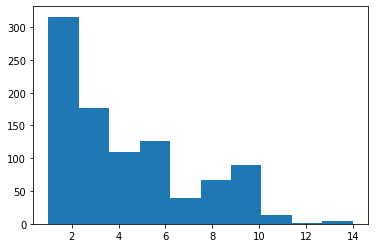

In [128]:
plt.hist(length_word)
plt.show()

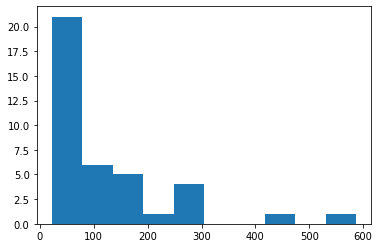

In [129]:
plt.hist(length_sent)
plt.show()

In [131]:
#strange results, not clear whether words are 300 in size or 2, 
#likewise if the sent size is 20.0 char or 25-70 chars

## bag-o-words

In [132]:
from collections import Counter
words = [w.lower() for w in word]

In [133]:
words

['the',
 'constituent',
 'assembly',
 'of',
 'india',
 'met',
 'in',
 'the',
 'constitution',
 'hall',
 ',',
 'new',
 'delhi',
 ',',
 'at',
 'eleven',
 'of',
 'the',
 'clock',
 ',',
 'the',
 'temporary',
 'chairman',
 '(',
 'sachchidananda',
 'sinha',
 ')',
 'in',
 'the',
 'chair',
 '.',
 'the',
 'chairman',
 'if',
 'any',
 'honorable',
 'member',
 'has',
 'arrived',
 'since',
 'yesterday',
 'afternoon',
 ',',
 'who',
 'has',
 'not',
 'yet',
 'signed',
 'the',
 'register',
 'nor',
 'presented',
 'his',
 'credentials',
 ',',
 'he',
 'may',
 'do',
 'so',
 'now',
 '.',
 '(',
 'nobody',
 'came',
 'forward',
 ')',
 '.',
 'the',
 'chairman',
 'i',
 'shall',
 'now',
 'take',
 'up',
 'item',
 'no',
 '.',
 '2',
 'which',
 'is',
 'the',
 'moving',
 'of',
 'a',
 'resolution',
 'prescribing',
 'procedure',
 'for',
 'the',
 'election',
 'of',
 'a',
 'permanent',
 'chairman',
 '.',
 'i',
 'understand',
 'that',
 'acharya',
 'kripalani',
 'will',
 'move',
 'this',
 'resolution',
 '.',
 'i',
 'invite'

In [134]:
bow = Counter(words)
print(bow.most_common(10))

[('the', 89), ('.', 33), (',', 31), ('of', 29), ('to', 23), ('be', 18), ('chairman', 17), ('i', 15), ('shall', 15), ('and', 15)]


## Lemmatization

In [172]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [173]:
english_stops = set(stopwords.words('english'))
no_stop = [w for w in words if w not in english_stops]

In [174]:
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(t) for t in no_stop]

In [175]:
bow_adv = Counter(lemmatized)
print(bow_adv.most_common(10))

[('.', 33), (',', 31), ('chairman', 17), ('member', 15), ('shall', 15), ('(', 14), (')', 14), ('candidate', 14), ('vote', 13), ('election', 11)]
